In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import sys
import seaborn as sns
%matplotlib inline
import contextily as cx
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'contextily'

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

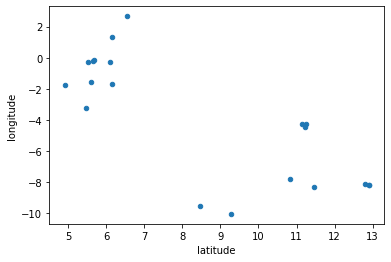

In [3]:
freqs = pd.read_csv("../../results/coeae1f_locus_cluster_frequencies.tsv", sep="\t")
freqs = freqs.query("country != 'Tanzania'")
freqs = freqs.drop_duplicates()
freqs.plot(x='latitude', y='longitude', kind='scatter')

In [4]:
freqs

,country,location,latitude,longitude,C1,C2,C3,C4,C5,C6,WT,n
0,Benin,Avrankou,6.550000,2.66700,0.105556,0.0,0.000000,0.000000,0.161111,0.000000,0.733333,180
1,Burkina Faso,Bana Village,11.233000,-4.47200,0.015707,0.0,0.136126,0.023560,0.000000,0.000000,0.824607,764
2,Burkina Faso,Pala,11.151000,-4.23500,0.000000,0.0,0.348684,0.065789,0.000000,0.000000,0.585526,304
3,Burkina Faso,Souroukoudinga,11.238000,-4.23500,0.000000,0.0,0.282051,0.044872,0.000000,0.000000,0.673077,156
4,Cote d'Ivoire,Aboisso,5.467000,-3.20000,0.000000,0.0,0.106667,0.626667,0.053333,0.013333,0.200000,150
5,Ghana,Koforidua,6.094000,-0.26100,0.000000,0.0,0.104167,0.562500,0.020833,0.000000,0.312500,48
6,Ghana,Korle-Bu,5.537000,-0.24000,0.052632,0.0,0.000000,0.000000,0.475564,0.000000,0.471805,1064
7,Ghana,Madina_North,5.683000,-0.16600,0.000000,0.0,0.297500,0.362500,0.007500,0.000000,0.332500,400
8,Ghana,Madina_West,5.668000,-0.21900,0.037037,0.0,0.037037,0.185185,0.166667,0.000000,0.574074,54
9,Ghana,Obuasi,6.151345,-1.65894,0.027818,0.0,0.029283,0.228404,0.131772,0.028551,0.554173,1366


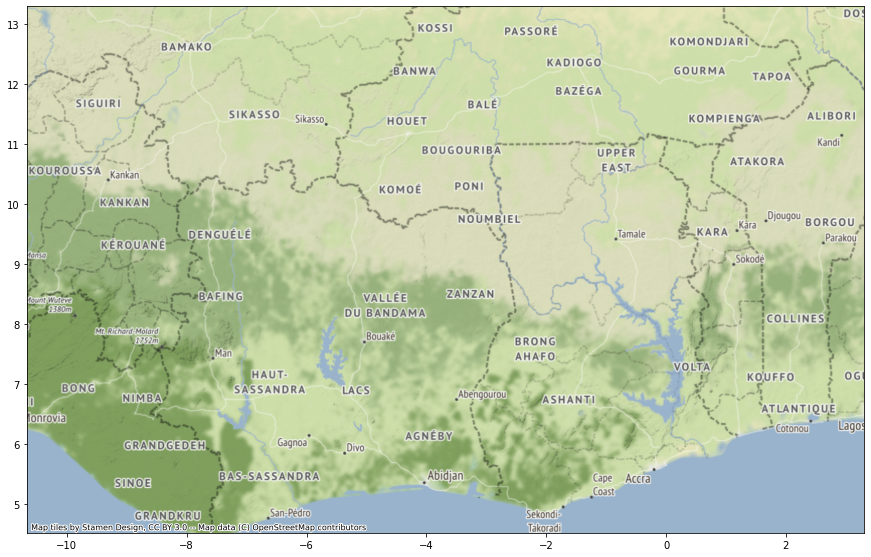

In [5]:
# Sample positions
freqMap = gpd.GeoDataFrame(
    freqs, geometry=gpd.points_from_xy(freqs.longitude, freqs.latitude, crs="EPSG:4326"))

ax = freqMap.plot(figsize=(15, 13), alpha=0)
cx.add_basemap(ax, crs="EPSG:4326")

In [6]:
hap_labels = freqs.iloc[:,4:11].columns.to_list()

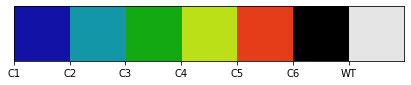

In [7]:
palette = sns.color_palette('nipy_spectral', n_colors=len(hap_labels) - 2, desat=0.8)
# add a colour for other_resistant
palette.append((0, 0, 0))
# add a colour for wt 
palette.append((0.9, 0.9, 0.9))
# check
sns.palplot(palette)
plt.gca().set_xticklabels(hap_labels);

In [8]:
# for legend
f_colors = {l: c for l, c in zip(hap_labels, palette)}
f_colors

{'C1': (0.07255235294117646, 0.07255235294117646, 0.6529711764705882),
 'C2': (0.0733366666666666, 0.5889099999999996, 0.6600300000000001),
 'C3': (0.07385313725490195, 0.6646782352941176, 0.07385313725490195),
 'C4': (0.7377500000000003, 0.87999, 0.09777666666666662),
 'C5': (0.9, 0.24117647058823533, 0.09999999999999998),
 'C6': (0, 0, 0),
 'WT': (0.9, 0.9, 0.9)}

In [9]:
import cartopy

In [10]:
freqMap = freqMap.query("n > 5")

In [11]:
freqMap.location.unique()

array(['Avrankou', 'Bana Village', 'Pala', 'Souroukoudinga', 'Aboisso',
       'Koforidua', 'Korle-Bu', 'Madina_North', 'Madina_West', 'Obuasi',
       'Takoradi', 'Twifo Praso', 'Koraboh', 'Koundara', 'Kababougou',
       'Ouassorola', 'Takan', 'Tieneguebougou', 'Toumani Oulena',
       'Baguida'], dtype=object)

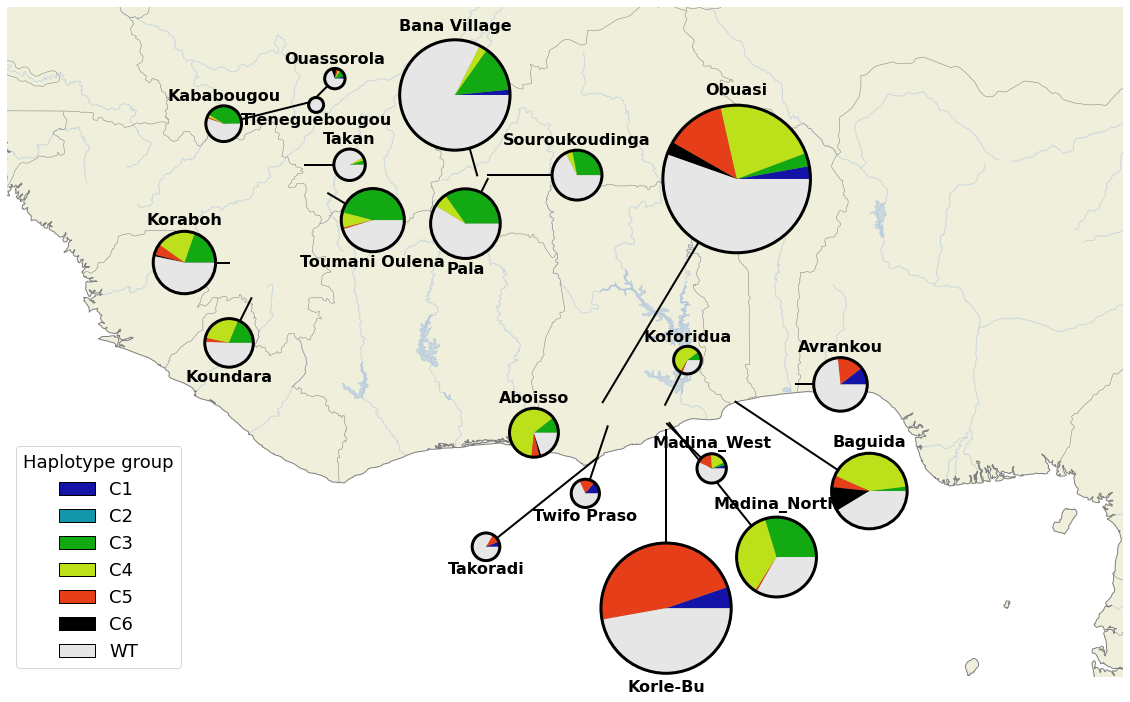

In [84]:
['Avrankou',
 'Bana Village',
 'Pala',
 'Souroukoudinga',
 'Aboisso',
 'Koforidua',
 'Korle-Bu',
 'Madina_North',
 'Madina_West',
 'Obuasi',
 'Takoradi',
 'Twifo Praso',
 'Koraboh',
 'Koundara',
 'Kababougou',
 'Ouassorola',
 'Takan',
 'Tieneguebougou',
 'Toumani Oulena',
 'Baguida']

#                                                   #madina
freqMap['offset_lat'] = [1, -0.5, -0.5, 2, 0, 0.5,     0,    2.4, 1, 3,  -2.5, -0.5, -1, -0.5, -2, 0.5,  1,   0,  1,   3]
freqMap['offset_lon'] = [0, 1.8,  -1,   0,   0, 1,    -4,   -3, -1,   5,  -2, -1.5, 0,  -1,    -0.5, 0.5, 0,   0,  -0.6, -2]
freqMap['label'] = ["bottom", "bottom", "top", "bottom", "bottom", "bottom", "top", "bottom", "bottom", "bottom", "top", "top", "bottom"
                    , "top", "bottom", "bottom", "bottom", "top", "top", "bottom"]

subplot_kw = dict(projection=ccrs.PlateCarree())
# figsize here is the entire figure size in inches, reduced later by bbox_inches
# This dpi setting affects the display size of the figure in the notebook
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
ax.add_feature(cfeature.LAND, linewidth=1, zorder=1, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, zorder=2, edgecolor='gray')
ax.add_feature(cfeature.LAKES, alpha=0.4)
ax.add_feature(cfeature.RIVERS, alpha=0.4)


pie_scale_factor=0.002

for _, row in freqMap.iterrows():
    ratios = np.asarray([row[k] for k in hap_labels])
    ratios = np.append(ratios, 1 - np.sum(ratios))

    # wedgeprops is used here just to pass the zorder command
    centre = (row.geometry.x + row.offset_lat, row.geometry.y + row.offset_lon)
    radius=np.sqrt(row.n * pie_scale_factor)

    ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=3))
    ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=palette, center=centre, radius=radius, shadow=True)

    lbl = row['location']
    if row.label == 'bottom':
        ax.text(centre[0], centre[1] + (radius + (0.1 * radius)), lbl, ha='center', va='bottom', fontsize=16, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=0, ), zorder=6)
    if row.label == 'top':
        ax.text(centre[0], centre[1] - (radius + (0.1 * radius)), lbl, ha='center', va='top', fontsize=16, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=0, ), zorder=6)

    if row.offset_lat != 0 or row.offset_lon != 0:
        ax.plot([row.geometry.x, row.geometry.x + row.offset_lat],[row.geometry.y, row.geometry.y + row.offset_lon], 'k-', lw=2, zorder=5)
    
        
#cover tiny island
#plt.plot([-15, -5],[-5, -30], 'w', lw=20, zorder=2)
ax.set_extent([-15, 10, 0, 15], crs=ccrs.PlateCarree())

handles = [matplotlib.patches.Patch(facecolor=f_colors[k], edgecolor='k', label=k) for k in hap_labels]
leg = ax.legend(handles=handles, bbox_to_anchor=(0, 0), loc='lower left', ncol=1, title="Haplotype group", title_fontsize=18, prop={'size': 18}, frameon=True, fancybox=True)    


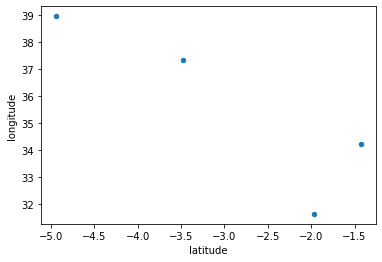

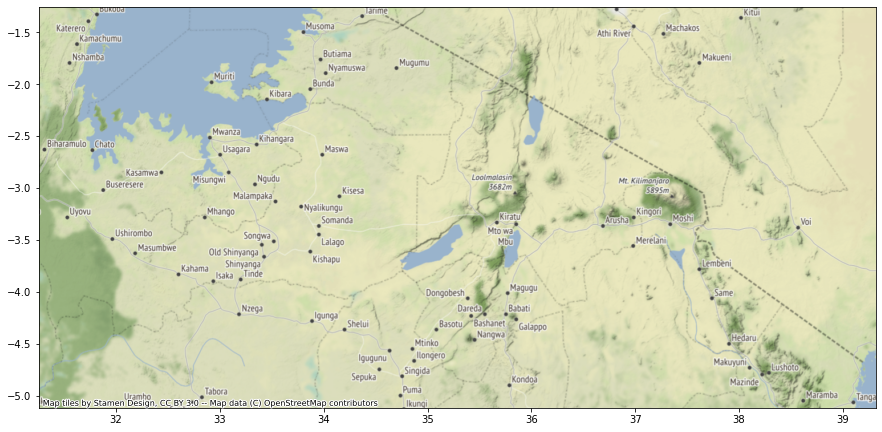

In [89]:
freqs = pd.read_csv("../../results/coeae1f_locus_cluster_frequencies.tsv", sep="\t")
freqs = freqs.query("country == 'Tanzania'")
freqs = freqs.drop_duplicates()
freqs.plot(x='latitude', y='longitude', kind='scatter')

# Sample positions
freqMap = gpd.GeoDataFrame(
    freqs, geometry=gpd.points_from_xy(freqs.longitude, freqs.latitude, crs="EPSG:4326"))

ax = freqMap.plot(figsize=(15, 13), alpha=0)
cx.add_basemap(ax, crs="EPSG:4326")

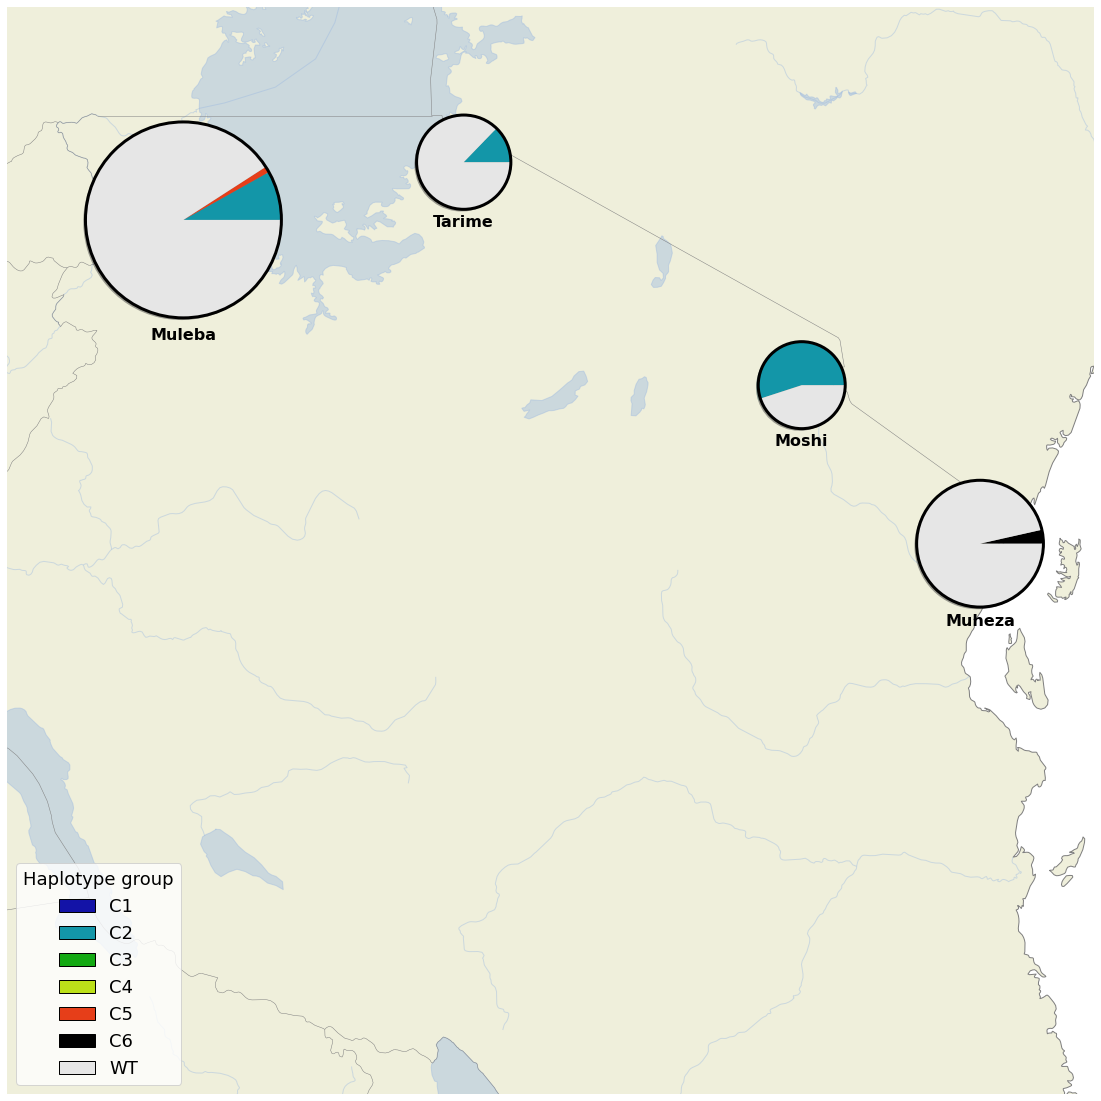

In [97]:
#                                                   #madina
freqMap['offset_lat'] = [0, 0, 0, 0]  
freqMap['offset_lon'] = [0, 0, 0, 0]
freqMap['label'] = ["top", "top", "top", "top"]

subplot_kw = dict(projection=ccrs.PlateCarree())
# figsize here is the entire figure size in inches, reduced later by bbox_inches
# This dpi setting affects the display size of the figure in the notebook
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
ax.add_feature(cfeature.LAND, linewidth=1, zorder=1, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, zorder=2, edgecolor='gray')
ax.add_feature(cfeature.LAKES, alpha=0.4)
ax.add_feature(cfeature.RIVERS, alpha=0.4)


pie_scale_factor=0.002

for _, row in freqMap.iterrows():
    ratios = np.asarray([row[k] for k in hap_labels])
    ratios = np.append(ratios, 1 - np.sum(ratios))

    # wedgeprops is used here just to pass the zorder command
    centre = (row.geometry.x + row.offset_lat, row.geometry.y + row.offset_lon)
    radius=np.sqrt(row.n * pie_scale_factor)

    ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=3))
    ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=palette, center=centre, radius=radius, shadow=True)

    lbl = row['location']
    if row.label == 'bottom':
        ax.text(centre[0], centre[1] + (radius + (0.1 * radius)), lbl, ha='center', va='bottom', fontsize=16, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=0, ), zorder=6)
    if row.label == 'top':
        ax.text(centre[0], centre[1] - (radius + (0.1 * radius)), lbl, ha='center', va='top', fontsize=16, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=0, ), zorder=6)

    if row.offset_lat != 0 or row.offset_lon != 0:
        ax.plot([row.geometry.x, row.geometry.x + row.offset_lat],[row.geometry.y, row.geometry.y + row.offset_lon], 'k-', lw=2, zorder=5)
    
        
#cover tiny island
#plt.plot([-15, -5],[-5, -30], 'w', lw=20, zorder=2)
ax.set_extent([30, 40, 0, -8], crs=ccrs.PlateCarree())

handles = [matplotlib.patches.Patch(facecolor=f_colors[k], edgecolor='k', label=k) for k in hap_labels]
leg = ax.legend(handles=handles, bbox_to_anchor=(0, 0), loc='lower left', ncol=1, title="Haplotype group", title_fontsize=18, prop={'size': 18}, frameon=True, fancybox=True)    
